# Instalación de librerias

Lo primero que debemos hacer es instalar las librerias de Beatiful Soup y requests. Ademas vamos a instalar la libreria de Selenium para poder interactuar de manera automatica con la pagina y webdriver-manager para manejar el driver de Google Chrome.

In [3]:
!pip3 install beautifulsoup4 --upgrade
!pip3 install requests
!pip3 install selenium
!pip3 install webdriver-manager

# Importación de librerias

Vamos a importar las librerias que tenemos que utilizar.

In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import json
import pandas as pd
import requests
from os.path  import basename
import time
from IPython.display import clear_output
from multiprocessing.pool import ThreadPool as Pool


# Obtención del listado de Cripto Monedas

Lo primero que vamos a obtener es el listado de las cripto monedas listadas en coinmarketcap. Para ello haremos el analisis de la home donde podemos obtener este listado y algunos detalles de dichas monedas. 

Si accedemos a la pagina "https://coinmarketcap.com/all/views/all/" podemos obtener un listado completo de todas las cripto monedas que tienen listadas:

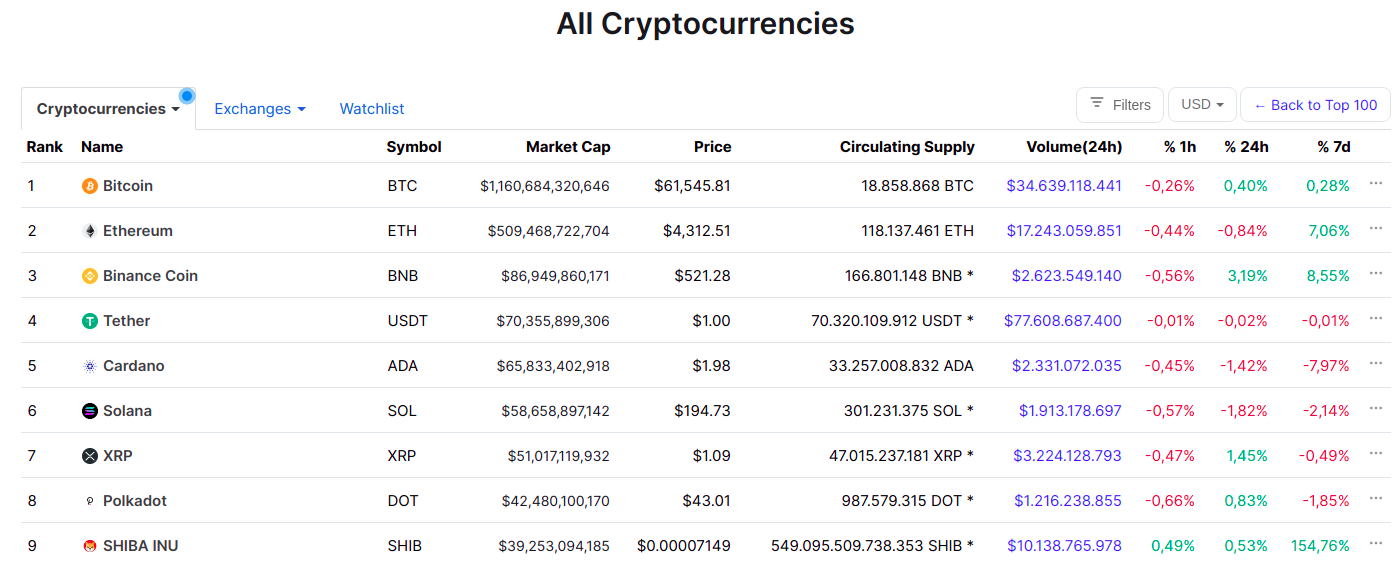

Si descendemos en la página podemos ver que existe un boton "Load More" que va cargando en el listado 200 monedas mas.

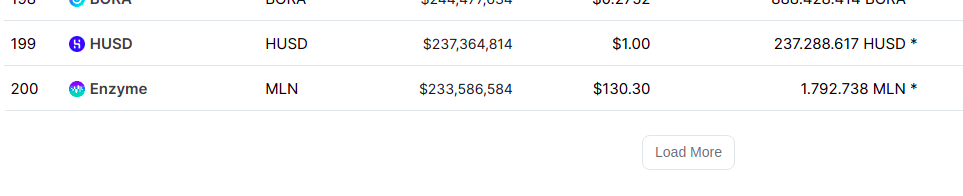

Si navegamos hasta el final tenemos en total mas de 6000 monedas por lo que el primer paso que debemos realizar es automatizar la obtención del indice completo de monedas para luego poder obtener su historico de cotización. Para ello mediante el uso de Selenium interactuaremos con la pagina haciendo click en el boton "Load More" hasta que este ya no exista en la pagina. 

Obtenemos una versión mas facil de trabajar de nuestra pagina web.


In [6]:
#Utilizamos la url donde podemos listar todas las criptos

url = "https://coinmarketcap.com/all/views/all/"

#Cargamos el driver de Chrome para poder utilizar Selenium y cargar nuestro contenido

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("--disable-extensions")

driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=chrome_options)
driver.maximize_window()

#Obtenemos la pagina web con la que podemos empezar a trabajar.
driver.get(url)
html = driver.page_source.encode('utf-8')

page_num = 0

#Hacemos un sleep para que le de tiempo a cargar la pagina completa.
time.sleep(5)

try:
    #Mientras que el exista el boton "Load More"
    while driver.find_element_by_xpath('//button[contains(text(), "Load More")]'):
        #Hacemos click el boton para cargar los siguientes elementos
        driver.find_element_by_xpath('//button[contains(text(), "Load More")]').click()
        
        page_num += 1
        print("getting page number "+str(page_num))
        #Realizamos otro sleep para que le de tiempo a cargar el contenido nuevo
        time.sleep(3)
except:
    print("Se ha finalizado la carga de paginas")
    
html = driver.page_source.encode('utf-8')

driver.close() # Cerramos el nevegador.

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [/home/rafaeloga/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache


getting page number 1
getting page number 2
getting page number 3
getting page number 4
getting page number 5
getting page number 6
getting page number 7
getting page number 8
getting page number 9
getting page number 10
getting page number 11
getting page number 12
getting page number 13
getting page number 14
getting page number 15
getting page number 16
getting page number 17
getting page number 18
getting page number 19
getting page number 20
getting page number 21
getting page number 22
getting page number 23
getting page number 24
getting page number 25
getting page number 26
getting page number 27
getting page number 28
getting page number 29
getting page number 30
getting page number 31
getting page number 32
getting page number 33
getting page number 34
getting page number 35
getting page number 36
getting page number 37
getting page number 38
getting page number 39
getting page number 40
getting page number 41
getting page number 42
Se ha finalizado la carga de paginas


Una vez hemos terminado de cargar todas las pagina podemos parsearla con BeatifulSoup para extraer la información que nos interesa.

In [7]:
soup = BeautifulSoup(html, "html.parser")
print(soup.title)

<title>All Cryptocurrencies | CoinMarketCap</title>


Si analizamos el contenido que hemos obtenido podemos ver que tenemos una serie de links < a> que nos darian las urls de todas la monedas listadas, donde podremos obtener la información que necesitamos. 
    
Si generamos una lista con todos los enlaces obtenemos mas de 6600 enlaces para descargar información:

In [9]:
data=[]
#Recorremos la tabla obteniendo los <a> 
links = soup.find_all('a', class_='cmc-table__column-name--name cmc-link')
links2 = soup.find_all('a', class_='cmc-link')


for row in links:
    link = row['href']
    data.append((link))

#Existen muchos links repetidos o que no corresponden a paginas de criptomonedas. 
#Limpiamos estas entradas de nuestra lista
for link in links2:
    if link['href'].startswith('/currencies/') and not(link['href'].endswith('/markets/')):
        if link['href'] not in data:
            data.append(link['href'])
            
print(len(data))
#Comprobamos los items obtenidos
for item in data:
    print(item)


6897
/currencies/bitcoin/
/currencies/ethereum/
/currencies/binance-coin/
/currencies/tether/
/currencies/cardano/
/currencies/solana/
/currencies/xrp/
/currencies/polkadot-new/
/currencies/shiba-inu/
/currencies/dogecoin/
/currencies/usd-coin/
/currencies/terra-luna/
/currencies/uniswap/
/currencies/wrapped-bitcoin/
/currencies/chainlink/
/currencies/avalanche/
/currencies/binance-usd/
/currencies/litecoin/
/currencies/polygon/
/currencies/algorand/
/currencies/bitcoin-cash/
/currencies/axie-infinity/
/currencies/stellar/
/currencies/vechain/
/currencies/cosmos/
/currencies/internet-computer/
/currencies/theta/
/currencies/ftx-token/
/currencies/tron/
/currencies/fantom/
/currencies/filecoin/
/currencies/ethereum-classic/
/currencies/multi-collateral-dai/
/currencies/bitcoin-bep2/
/currencies/hedera/
/currencies/near-protocol/
/currencies/crypto-com-coin/
/currencies/tezos/
/currencies/elrond-egld/
/currencies/monero/
/currencies/decentraland/
/currencies/the-graph/
/currencies/flow/


/currencies/icecubes-finance/
/currencies/metamui/
/currencies/eqifi/
/currencies/defi-for-you/
/currencies/union-fair-coin/
/currencies/wrapped-okt/
/currencies/defido/
/currencies/bitcoin-god/
/currencies/3x-long-cosmos-token/
/currencies/3x-long-xrp-token/
/currencies/binstarter/
/currencies/waxe/
/currencies/vectorium/
/currencies/defi-warrior/
/currencies/king-shiba/
/currencies/premia/
/currencies/soldate-token/
/currencies/hopr/
/currencies/kodi/
/currencies/polaris-share/
/currencies/folgoryusd/
/currencies/upper-euro/
/currencies/onx-finance/
/currencies/medacoin/
/currencies/morpheus-token/
/currencies/pontoon/
/currencies/blind-boxes/
/currencies/wrapped-centrifuge/
/currencies/crosswallet/
/currencies/darenft/
/currencies/brick-token/
/currencies/bezoge-earth/
/currencies/xrpdown/
/currencies/red-floki/
/currencies/cake-monster/
/currencies/core-multichain/
/currencies/larix/
/currencies/dog-collar/
/currencies/plug-chain/
/currencies/hellmoon/
/currencies/valkyrio/
/curren

# Scraping de las páginas de cada critpomoneda.
Una vez obtenido el listado de monedas, recorremos cada una de ellas y accedemos a sus precios hitoricos que seran los que almacenemos en nuestro dataset.


In [10]:
dataName=[]
dataSymbol=[]
dataLogo=[]
dataUrl=[]
dataHistoricFile=[]
dataHistoricDate=[]
dataHistoricOpen=[]
dataHistoricHigh=[]
dataHistoricLow=[]
dataHistoricClose=[]
dataHistoricVolume=[]
dataHistoricMarketCap=[]
dataHistoricSymbol=[]
i=0

try:
    driver.close()
except:
    pass
        

#Preparamos el driver para abrir el navegador
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("--disable-extensions")


driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=chrome_options)

#Iteramos por cada item. OJO!!! Son mas de 6600 iteraciones por lo que la ejecución
#tarda mas de 8 horas. Se deja comentada la linea para tratar las primeras 250
for item in data:
#for item in data[:250]:
    dataHistoricDate=[]
    dataHistoricOpen=[]
    dataHistoricHigh=[]
    dataHistoricLow=[]
    dataHistoricClose=[]
    dataHistoricVolume=[]
    dataHistoricMarketCap=[]
    dataHistoricSymbol=[]
    i=i+1
    print(i)
    try:
        #Recogemos la pagina con los precios historicos de cada item.
        url = "https://coinmarketcap.com" + item +  "historical-data/"
        driver.maximize_window()
        driver.get(url)
        
        time.sleep(1)
        html = driver.page_source.encode('utf-8')
        
        
        #Seleccionamos con Selenium el historico de 365 dias. Por defecto solo carga 2 meses
        driver.find_element_by_xpath('//Button[contains(text(), "Date Range")]').click() 
        driver.find_element_by_xpath('//li[contains(text(), "Last 365 days")]').click()
        driver.find_element_by_xpath('//button[contains(text(), "Continue")]').click()
        
        
        time.sleep(1)
        html = driver.page_source.encode('utf-8')


        soup = BeautifulSoup(html, "html.parser")

        table = soup.find('table').find('tbody')    
        
        #Parseamos logo y nombre y codigo de la crypto.
        divsTitle = soup.find_all('div', class_='sc-16r8icm-0 gpRPnR nameHeader')
        
        url = item
        dataUrl.append(url)
        
        symbol= divsTitle[0].small.text
        dataSymbol.append(symbol)
    
        name= divsTitle[0].h2.text.replace(symbol,'')
        dataName.append(name)
    
        logoURL = divsTitle[0].img.get('src')
        
        
        dataLogo.append(symbol+".png")
    
        dataHistoricFile.append(symbol+'.csv')
        
        #Parseamos tabla de cotizaciones.
        for tr in table.find_all('tr'):
            tds = tr.find_all('td')
            dataHistoricSymbol.append(symbol)
            dataHistoricDate.append(tds[0].text)
            dataHistoricOpen.append(tds[1].text)
            dataHistoricHigh.append(tds[2].text)
            dataHistoricLow.append(tds[3].text)
            dataHistoricClose.append(tds[4].text)
            dataHistoricVolume.append(tds[5].text)
            dataHistoricMarketCap.append(tds[6].text)
        
        dictHistoric={'symbol': dataHistoricSymbol, 'date':dataHistoricDate, 'open': dataHistoricOpen,
             'high': dataHistoricHigh, 'low':dataHistoricLow, 'close':dataHistoricClose, 'volume':dataHistoricVolume,
             'marketCap':dataHistoricMarketCap}
        df_hist = pd.DataFrame(dictHistoric)
        
        #Creamos el csv con los datos historicos en la carpeta historic data
        df_hist.to_csv("./historicData/"+symbol+".csv", index=False)
        
        
        #Guardamos la imagen el la carpeta imagen
        with open("./images/"+symbol+".png","wb") as f:
                f.write(requests.get(logoURL).content)
        
        clear_output(wait=True)
       
    except:
        pass

#Una vez que hemos recorrido todos los elementos generamos un dataset a modo de indice.
#Este dataset contiene el indice de todas las criptomonedas para poder acceder a ellas sin tener que volver a 
#ejecutar todo lo anterior.
dictData={'name': dataName, 'symbol': dataSymbol, 'logo': dataLogo, 'historicalFile': dataHistoricFile, 'url':dataUrl}
df = pd.DataFrame(dictData)
df.to_csv("coin_info.csv",index=False)     
driver.close()

6897


Una vez finalizado este proceso tenemos los siguientes datos almecenados:

- Todas las imagenes de los logos en la carpeta /images
- Un csv por cada criptomoneda con los datos historicos en la carpeta /dataHistoric.
- Un csv completo con el indice y datos de todas las criptomonedas desccargadas. Se llama "coin_info.csv"


# Actualización de los datos historicos a diario.

Como se ha visto en el apartado anterior, la descarga inicial de todos los historicos es un proceso excesivamente costoso en tiempo. 

Lo ideal es que los datos de cotizaciones los tengamos actualizados a diario con dos objetivos:

- Tener el dato actualizado de cotización. De nada nos sirve tener los datos de hace un mes.
- Tener un hitorico que se vaya ampliando a diario. De esta manera en lugar de tener el historico de un año como se carga de inicio, a diario se iran añadiendo datos nuevos que nos permite ampliar el tamaño del historico. 

Para ello hemos creado una función similar a lo ejecutado anteriormente pero mucho mas ligero para actualizar los valores diarios. En esta ocasion no es necesario obtener por Selenium mas historico y no es necesario hacer tantos sleep como antes. 

Ademas, como no es necesario generar el indice general la ejecución la podemos paralelizar de manera que podamos cargar varias paginas al mismo tiempo, reduciendo drasticamente el tiempo total de ejecución. 



In [11]:
def updateHist(ruta,symbol):
    print("entra " + symbol)
    dataName=[]
    dataSymbol=[]
    dataLogo=[]
    dataUrl=[]
    dataHistoricDate=[]
    dataHistoricOpen=[]
    dataHistoricHigh=[]
    dataHistoricLow=[]
    dataHistoricClose=[]
    dataHistoricVolume=[]
    dataHistoricMarketCap=[]
    dataHistoricSymbol=[]
    clear_output(wait=True)
    try:
        df = pd.read_csv("./historicData/"+symbol+'.csv')  
        
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument("--disable-extensions")

        driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=chrome_options)    


        url = "https://coinmarketcap.com" + ruta +  "historical-data/"
        driver.maximize_window()
        driver.get(url)
        
        time.sleep(1)
        html = driver.page_source.encode('utf-8')
    
        soup = BeautifulSoup(html, "html.parser")
        table = soup.find('table').find('tbody')
        
        dataSymbol.append(symbol)
        
        #dataHistoricFile.append(symbol+'.csv')
                #Parseamos tabla de cotizaciones.
        for tr in table.find_all('tr'):
            tds = tr.find_all('td')
            dataHistoricSymbol.append(symbol)
            dataHistoricDate.append(tds[0].text)
            dataHistoricOpen.append(tds[1].text)
            dataHistoricHigh.append(tds[2].text)
            dataHistoricLow.append(tds[3].text)
            dataHistoricClose.append(tds[4].text)
            dataHistoricVolume.append(tds[5].text)
            dataHistoricMarketCap.append(tds[6].text)
        
        dictHistoric={'symbol': dataHistoricSymbol, 'date':dataHistoricDate, 'open': dataHistoricOpen,
                     'high': dataHistoricHigh, 'low':dataHistoricLow, 'close':dataHistoricClose, 'volume':dataHistoricVolume,
                     'marketCap':dataHistoricMarketCap}
        df_hist = pd.DataFrame(dictHistoric)
        df.reset_index(drop=True, inplace=True)
        df_hist.reset_index(drop=True, inplace=True)
        
        df_end = pd.concat([df_hist,df], axis=0).drop_duplicates(subset=['date']).reset_index(drop=True)
        
        df_end.to_csv("./historicData/"+symbol+".csv", index=False)
        driver.close()
    except:
        driver.close()



Una vez creada la función, creamos un pool de threads para ejecutar varios procesos de manera paralela. Se ha dejado configurado a 7 threads aunque habra que tener en cuenta el numero de cores del ordenador que ejecuta el siguiente proceso:

In [12]:
horaIncio = time.strftime("%c")
pool_size = 7
pool = Pool(pool_size)
df = pd.read_csv("coin_info.csv")  
for index, row in df.iterrows():
    pool.apply_async(updateHist, (row["url"],row["symbol"],))
    #updateHist(row["url"],row["symbol"],driver)

pool.close()
pool.join()

print("Fecha y hora Inicio " + horaIncio)
print ("Fecha y hora Fin " + time.strftime("%c"))

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [/home/rafaeloga/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache


Fecha y hora Inicio Sat Oct 30 23:45:59 2021
Fecha y hora Fin Sun Oct 31 01:20:23 2021


In [3]:
updateHist("/currencies/bitcoin/","BTC")

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [/home/rafaeloga/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache
